In [1]:
from mplsoccer.pitch import Pitch
import numpy as np
import pandas as pd

# Some data from Fbref / StatsBomb

In [2]:
fb_data = {'team': ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley', 'Chelsea',
                    'Crystal Palace', 'Everton', 'Leicester City', 'Liverpool', 'Manchester City',
                    'Manchester Utd', 'Newcastle Utd', 'Norwich City', 'Sheffield Utd', 'Southampton',
                    'Tottenham', 'Watford', 'West Ham', 'Wolves'],
           'tackle_def_3rd': [271, 287, 241, 279, 210, 294, 334, 310, 315, 192, 187, 243, 326, 349,
                              293, 326, 288, 290, 337, 346],
           'tackle_mid_3rd': [168, 161, 178, 203, 203, 246, 206, 234, 241, 222, 192, 200, 163, 186,
                              184, 256, 242, 219, 213, 219],
           'tackle_att_3rd': [60, 60, 47, 77, 66, 75, 56, 95, 82, 104, 85, 72, 51, 69, 71, 84, 51,
                              70, 52, 58],
           'pressure_def_3rd': [1909, 1858, 1882, 1653, 1463, 1509, 2113, 1655, 1793, 1295, 995, 1611,
                                2233, 2249, 1795, 1900, 1917, 1933, 2091, 2032],
           'pressure_mid_3rd': [2227, 2100, 2431, 2033, 2193, 2416, 2153, 2257, 2420, 2029, 1853,
                                2303, 2061, 2302, 2256, 2508, 2350, 2509, 2465, 2445],
           'pressure_att_3rd': [1018, 1048, 1272, 1155, 1264, 1307, 942, 1197, 1187, 1520, 1391, 1179,
                                861, 1034, 1291, 1472, 1026, 1239, 1064, 937]}

In [4]:
df = pd.DataFrame(fb_data)

Add league total

In [6]:
df = pd.DataFrame(fb_data)
df = df.append(df.sum(numeric_only=True), ignore_index=True).copy()
df.loc[df.team.isnull(), 'team'] = 'league total'

Calculate percentages

In [7]:
tackle_cols = ['tackle_def_3rd', 'tackle_mid_3rd', 'tackle_att_3rd']
df[tackle_cols] = df[tackle_cols].divide(df[tackle_cols].sum(axis=1), axis=0)

In [8]:
pressure_cols = ['pressure_def_3rd', 'pressure_mid_3rd', 'pressure_att_3rd']
df[pressure_cols] = df[pressure_cols].divide(df[pressure_cols].sum(axis=1), axis=0)

In [12]:
all_cols = tackle_cols + pressure_cols

Calculate the percentage point difference from the league average

In [29]:
df.loc[df.team != 'league total', all_cols] = (df.loc[df.team != 'league total', all_cols].values -
                                               df.loc[df.team == 'league total', all_cols].values)

Show the dataframe

In [31]:
df

,team,tackle_def_3rd,tackle_mid_3rd,tackle_att_3rd,pressure_def_3rd,pressure_mid_3rd,pressure_att_3rd
0,Arsenal,0.034322,-0.031331,-0.002991,0.027317,-0.001088,-0.026229
1,Aston Villa,0.056197,-0.051075,-0.005121,0.028080,-0.013683,-0.014397
2,Bournemouth,0.008403,0.013970,-0.022373,-0.006101,0.002094,0.004007
3,Brighton,-0.009659,-0.004856,0.014514,-0.001617,-0.013225,0.014842
4,Burnley,-0.070351,0.055795,0.014555,-0.045717,0.012552,0.033165
5,Chelsea,-0.030715,0.031996,-0.001280,-0.054658,0.028594,0.026063
6,Crystal Palace,0.051639,-0.022367,-0.029272,0.062647,-0.019777,-0.042870
7,Everton,-0.023631,-0.001807,0.025438,-0.019137,0.008590,0.010547
8,Leicester City,-0.015034,0.009739,0.005295,-0.011038,0.014969,-0.003931
9,Liverpool,-0.138108,0.060567,0.077541,-0.075734,-0.014311,0.090045


# Draw League Average on a pitch

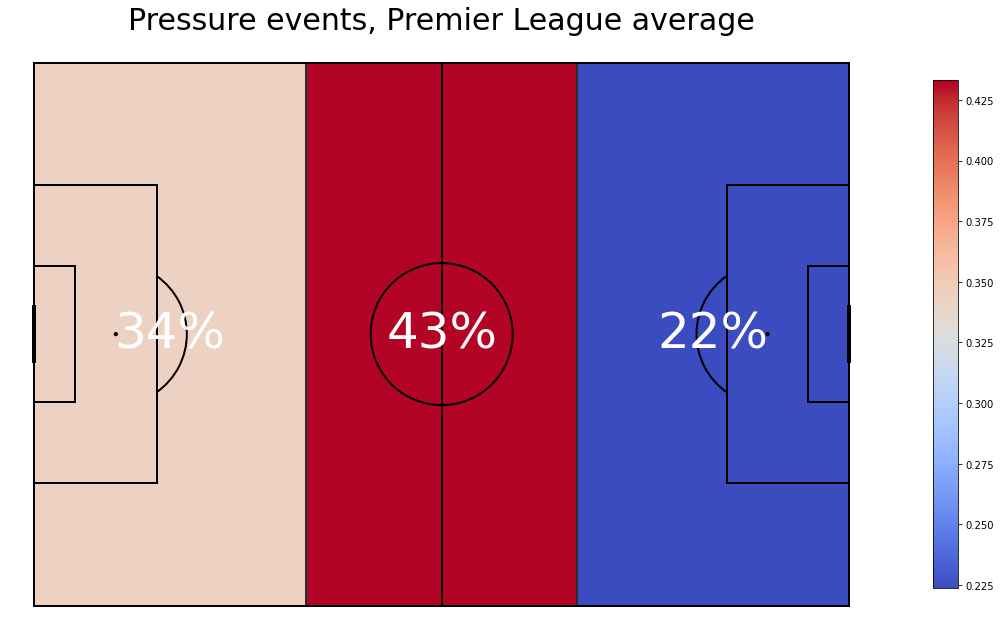

In [41]:
pitch = Pitch(line_zorder=2, line_color='black', figsize=(16, 9))
fig, ax = pitch.draw()
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3,1))
bin_statistic['statistic'] = df.loc[df.team=='league total', pressure_cols].values
heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
ax.set_title('Pressure events, Premier League average', fontsize=30)
fig.colorbar(heatmap, shrink=0.85)
bin_statistic['statistic'] = (pd.DataFrame(bin_statistic['statistic'])
                              .applymap(lambda x: '{:.0%}'.format(x))
                              .values)
annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=50, ax=ax, ha='center', va='center')

# Draw the percentage point difference from the league average

(4, 5)


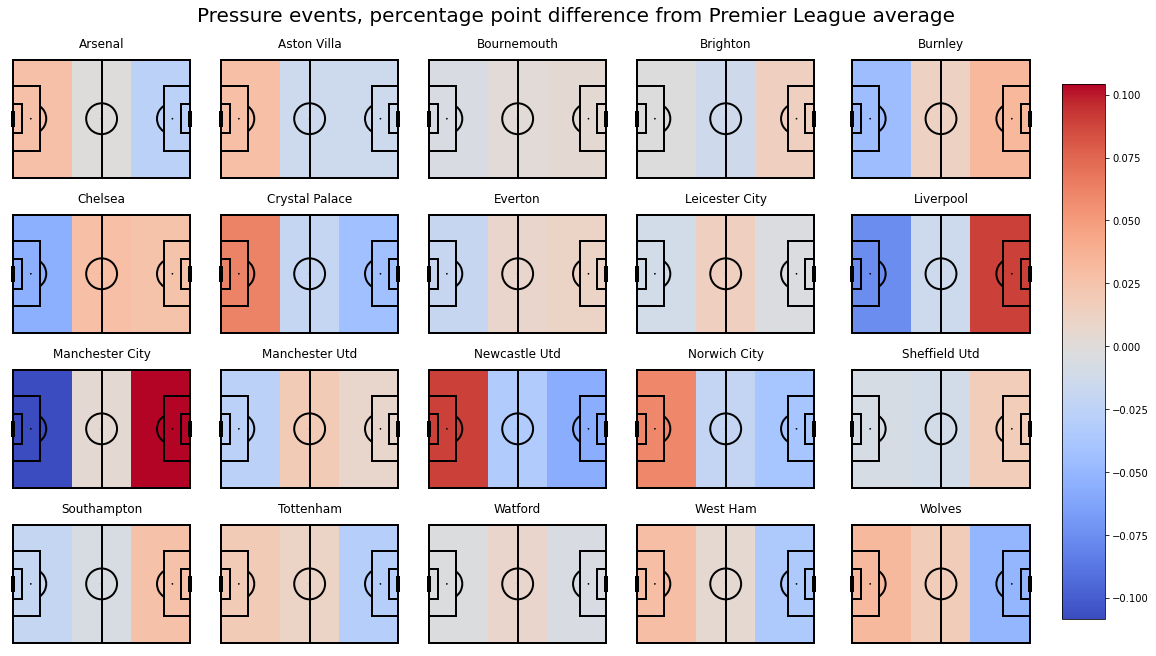

In [78]:
pitch = Pitch(line_zorder=2, line_color='black', figsize=(16, 9), layout=(4, 5), tight_layout=False, constrained_layout=True)
fig, axes = pitch.draw()
axes = axes.ravel()
teams = df.team.values[:-1]
vmin = df.loc[df.team != 'league total', pressure_cols].min().min()
vmax = df.loc[df.team != 'league total', pressure_cols].max().max()
for i, ax in enumerate(axes):
    ax.set_title(teams[i])
    bin_statistic['statistic'] = df.loc[df.team == teams[i], pressure_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', vmin=vmin, vmax=vmax)
axes = axes.reshape(4, 5)
cbar = fig.colorbar(heatmap, ax=axes[:, 4], shrink=0.9)
title = fig.suptitle('Pressure events, percentage point difference from Premier League average', fontsize=20)